In [52]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [53]:
vid_folder = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos'

videos = []

for file in os.listdir(vid_folder):
    if file.endswith('labeled.mp4'):
        videos.append(os.path.join(vid_folder, file))
sorted(videos)


['/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr2DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr3DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr4DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_

In [54]:
h5files = []
vid_to_crop = []

for file in os.listdir(vid_folder):
    if file.endswith('filtered.h5'):
        h5files.append(os.path.join(vid_folder,file))

for file in os.listdir(vid_folder):   
    if file.endswith("labeled.mp4"):
        vid_to_crop.append(os.path.join(vid_folder,file))

x =  sorted(h5files)
sorted(vid_to_crop)

['/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr2DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr3DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr4DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
 '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_

In [55]:
def crop_it(feed):
    # feed = ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.h5',
    #         '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4',
    #         'DLC_resnet50_DLCApr12shuffle1_1030000']
    fl_pth, vid_pth, x = feed
    # deeplabcut.analyze_videos(config_path, 'CropGr.mp4', save_as_csv=True, dynamic=(True,.6,30))
    print("Starting Cropping")

    # Define the names of the facial features that you want to extract frames for
    feature_names = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']

    # Load tracking results generated by DeepLabCut
    tracking_data = pd.read_hdf(fl_pth)
    # x = tracking_data['DLC_resnet50_DLCApr12shuffle1_1030000'][feature_names]
    # x.isna().any()

    necessary_points = tracking_data[x][feature_names]
    # Define the threshold for the confidence score of the facial features
    confidence_threshold = 0.98

    # Load the input video
    cap = cv2.VideoCapture(vid_pth)

    tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # initializing the frame id list
    frame_ids = []

    # Loop through the video frames and extract frames with facial features
    frame_number = 0
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    while (cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            # Get the tracking data for the current frame
            frame_data = necessary_points.loc[frame_number]
            # print(frame_data)

            # Check if the desired facial features are present in the frame
            feature_present = False
            check = 0            
            for feature_name in feature_names:
                if feature_name in frame_data and frame_data.loc[feature_name].loc['likelihood'] > confidence_threshold:
                    # print(frame_number, '   ', frame_data.loc[feature_name].loc['likelihood'])
                    check += 1
            
            if check==4:
                feature_present = True

            # If the desired facial features are present, save the frame to the output video
            if feature_present: #check==4
                frame_ids.append(frame_number)

            # Display the output
            #cv2.imshow('output', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            print(round(frame_number/tot_frame*100, 2), end = '\r')
            # Increment the frame number
            frame_number += 1
        else:
            break
    print("Done")
    # Release resources
    cap.release()
    # out.release()
    cv2.destroyAllWindows()
    return frame_ids

In [56]:
crop_source = []
# sorted(h5files)
if len(x)==len(vid_to_crop):
    for i in x:
        # print(i)
        found = ''
        for j in vid_to_crop:
            x = os.path.splitext(i)[0].rstrip('_filtered.h5')
            y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
            if x==y:
                found = j
        k = os.path.basename(i)
        l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
        print(l)
        print(i)
        print(found)
        # # print(k)
        # print('')
        crop_source.append([i,found, l])
c_s = np.array(crop_source)
c_s


DLC_resnet50_DLCMay2shuffle1_1030000
/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered.h5
/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4
DLC_resnet50_DLCMay2shuffle1_1030000
/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered.h5
/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4
DLC_resnet50_DLCMay2shuffle1_1030000
/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr2DLC_resnet50_DLCMay2shuffle1_1030000_filtered.h5
/home/yrama

array([['/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered.h5',
        '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr0DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
        'DLC_resnet50_DLCMay2shuffle1_1030000'],
       ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered.h5',
        '/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr1DLC_resnet50_DLCMay2shuffle1_1030000_filtered_labeled.mp4',
        'DLC_resnet50_DLCMay2shuffle1_1030000'],
       ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/final_video/final_video/final_video/DLC-VK-2023-05-02/videos/CropGr2DLC_resnet50_DLCMay2

In [57]:
all_frames = []
# jk = crop_it(c_s[6])
for i in c_s:
    x = crop_it(i)
    all_frames.append([i[1],x])
# jk


Starting Cropping
Done9
Starting Cropping
Done9
Starting Cropping
Done9
Starting Cropping
Done9
Starting Cropping
Done9
Starting Cropping
Done9


In [58]:
stt = []
for i in all_frames:
    stt.append(len(i[1]))
stt

[3351, 5187, 4030, 2497, 1220, 581]

[1, 2, 3, 4, 5, 6]


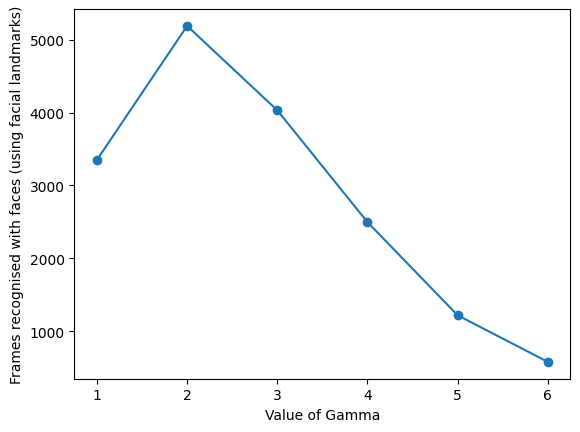

In [59]:
j = [(i+1) for i in range(6)]
print(j)
plt.plot(j, stt, 'o-')
plt.xlabel('Value of Gamma')
plt.ylabel('Frames recognised with faces (using facial landmarks)')
# plt.show()
plt.savefig('Frames_across_gamma.png')

In [ ]:
af = pd.DataFrame(all_frames, columns = ['File_name', 'framesIDS'])
af